**Note:** Updated with Hf, B coefficents provided by Ivan.

# Request:
Javier,

Please make Casandra calculation of the deposition rate of 2 inch magnetrons with the pressure targets voltage and current as shown in the next slide.

The target to substrate distance is 14 cm
The racetrack dimensions say R1 = 10 mm and R2 = 20 mm.
Base Pressure : 4.5 × 10-9 torr
Working Pressure Ar: 2.5 × 10-3 torr

You may calculate only one of the Boron cases – I assume they all will be very close.

| HfB-1         | Boron |  Hafnium |
|---------------|:-----:|:--------:|
| Power         |   60  |     5    |
| Voltage       |  335  |    221   |
| Current ( mA) |  179  |   23.5   |

| HfB-2        | Boron |  Hafnium |
|--------------|:-----:|:--------:|
| Power        |   60  |    10    |
| Voltage      |  340  |   231.9  |
| Current (mA) |  176  |    43    |

| HfB-3        |  Boron | Hafnium |
|--------------|:------:|:-------:|
| Power        |   60   |    15   |
| Voltage      |   347  |  237.8  |
| Current (mA) |   172  |    64   |

| HfB-4        |  Boron | Hafnium |
|--------------|:------:|:-------:|
| Power        |   60   |    20   |
| Voltage      |   357  |   247   |
| Current (mA) |   172  |    64   |

# Step 1: Import needed modules (python libraries)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysputt as ps
import pandas as pd
import copy

# Define calculation parameters
This is done by creating a CalcInput object and setting the properties. Right now it has to be done through code. The next step is to wrap it up in a graphical interface.

**Note:** I don't have a COE file for B. I'm using Al values for U0, QZ, DEN
## HfB-1, B

In [2]:
input_data = ps.CalcInput()

input_data.Gas_symbol = 'Ar'
input_data.MG = 39.948 #atomic mass
input_data.ZG = 18 #atomic number
input_data.RG = 0.98 # atomic radius
input_data.UG = 5 #
input_data.QG = 1
input_data.DENG = 5
input_data.KAPA = 0.0002

input_data.Target_symbol= 'B'
input_data.MA = 10.8 #atomic mass
input_data.ZA = 5
input_data.RA = 1
input_data.U0 = 5.26 
input_data.QZ = 1.0 
input_data.DEN = 2.37

input_data.disch_volt = 335. #V
input_data.disch_cur = 0.179 #Amp
input_data.pres = 0.333 #Pa = 2.5 mTorr
input_data.Eavg = 10. #This is a guess
input_data.T0 = 300.

input_data.Tcorrect = False # No T correction

input_data.in_rad = 10 #mm
input_data.out_rad = 20 #mm
input_data.dist = 140 #mm
input_data.L5 = 2.5
input_data.N1 = 50
input_data.N2 = 50
input_data.grid_R2 = 1

In [3]:
print(input_data)

Sputtering calculation input parameters:
Atom	M	Z	R	U	Q	DEN	KAPA
Ar	39.948	18	0.98	5	1	5	0.0002
B	10.8	5	1	5.26	2.37	1.0
Discharge voltage (V): 335.0
Discharge current (A): 0.179
Gas pressure (Pa): 0.333
Average energy of sputtered atom (eV): 10.0
Gas temperature (K): 300.0
Perform T correction?: No
Erosion disk inner radius (mm): 10
Erosion disk outer radius (mm): 20
Target to substrate distance(mm): 140
Calculated radius / outer erosion radius: 2.5
Number of steps for radial integration at target: 50
Number of steps for polar integration at target: 50
mm between calculated data points: 1


## The next line performs the calculation
Unfortunately, there is no feedback as to how long he the calculation takes. But shouldn't be more than a minute or so, depending in how fine a grid we are using.

In [4]:
calc_sput = ps.Sputt_plan_circ(input_data)

## After the calculation
all calculated parameters are inside the returned object *calc_sput*. We can access the parameters of interest

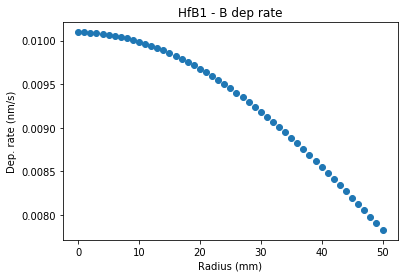

In [5]:
B_dep_rate = calc_sput.DEP1
r = calc_sput.pR
plt.plot(r, B_dep_rate,'o')
plt.xlabel('Radius (mm)')
plt.ylabel('Dep. rate (nm/s)')
plt.title('HfB1 - B dep rate');

 ## Now for Hf
 First, we copy the input parameters and modify as needed
 

In [6]:
Hf_input_data = copy.copy(input_data)

In [7]:
Hf_input_data.Target_symbol= 'Hf'
Hf_input_data.MA = 178.5 #atomic mass
Hf_input_data.ZA = 72
Hf_input_data.RA = 1
Hf_input_data.U0 = 6.44 
Hf_input_data.QZ = 0.64 
Hf_input_data.DEN = 13.31

Hf_input_data.disch_volt = 221. #V
Hf_input_data.disch_cur = 0.0235 #Amp

In [8]:
print(Hf_input_data)

Sputtering calculation input parameters:
Atom	M	Z	R	U	Q	DEN	KAPA
Ar	39.948	18	0.77	5	1	5	0.0002
Hf	178.5	72	1	6.44	13.31	0.64
Discharge voltage (V): 221.0
Discharge current (A): 0.0235
Gas pressure (Pa): 0.333
Average energy of sputtered atom (eV): 10.0
Gas temperature (K): 300.0
Perform T correction?: No
Erosion disk inner radius (mm): 10
Erosion disk outer radius (mm): 20
Target to substrate distance(mm): 140
Calculated radius / outer erosion radius: 2.5
Number of steps for radial integration at target: 50
Number of steps for polar integration at target: 50
mm between calculated data points: 1


## Perform the calculation, retrieve results, and plot

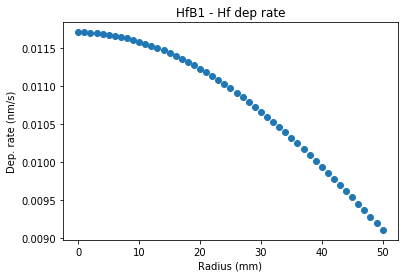

In [9]:
Hf_calc_sput = ps.Sputt_plan_circ(Hf_input_data)
Hf_dep_rate = Hf_calc_sput.DEP1
r = Hf_calc_sput.pR
plt.plot(r, Hf_dep_rate,'o')
plt.xlabel('Radius (mm)')
plt.ylabel('Dep. rate (nm/s)')
plt.title('HfB1 - Hf dep rate');

## Do you want to know the Hf/B ratio?

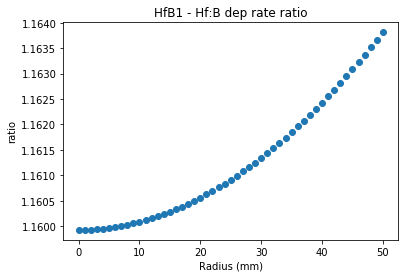

In [10]:
plt.plot(r, Hf_dep_rate / B_dep_rate,'o')
plt.xlabel('Radius (mm)')
plt.ylabel('ratio')
plt.title('HfB1 - Hf:B dep rate ratio');

## Export calculated dep rates to excel file


In [11]:
HfB_1 =pd.DataFrame(
    data = {
        'r (mm)': r,
        'Hf (nm/s)': Hf_dep_rate,
        'B (nm/s)': B_dep_rate
    })

In [12]:
writer = pd.ExcelWriter('Ivan_HfB.xlsx', engine='xlsxwriter')
HfB_1.to_excel(writer, sheet_name='HfB_1')
writer.save()

# And now, the other conditions
We only need to modify the input parameters and redo the calculation
## HfB-2

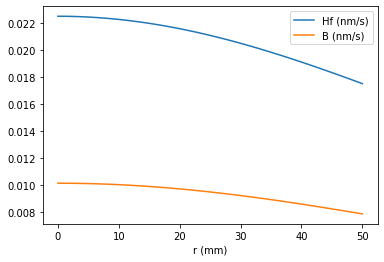

In [13]:
# B
input_data.disch_volt = 340. #V
input_data.disch_cur = 0.176 #Amp
calc_sput = ps.Sputt_plan_circ(input_data)

#Hf 
Hf_input_data.disch_volt = 231.9 #V
Hf_input_data.disch_cur = 0.043 #Amp
Hf_calc_sput = ps.Sputt_plan_circ(Hf_input_data)

#format for excel
HfB_2 =pd.DataFrame(
    data = {
        'r (mm)': calc_sput.pR,
        'Hf (nm/s)': Hf_calc_sput.DEP1,
        'B (nm/s)': calc_sput.DEP1
    })

#plot to check
HfB_2.plot(x='r (mm)', y=['Hf (nm/s)','B (nm/s)' ])

## HfB-3

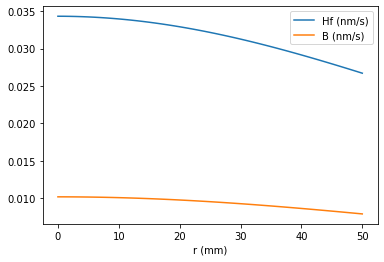

In [14]:
# B
input_data.disch_volt = 347. #V
input_data.disch_cur = 0.172 #Amp
calc_sput = ps.Sputt_plan_circ(input_data)

#Hf 
Hf_input_data.disch_volt = 237.8 #V
Hf_input_data.disch_cur = 0.064 #Amp
Hf_calc_sput = ps.Sputt_plan_circ(Hf_input_data)

#format for excel
HfB_3 =pd.DataFrame(
    data = {
        'r (mm)': calc_sput.pR,
        'Hf (nm/s)': Hf_calc_sput.DEP1,
        'B (nm/s)': calc_sput.DEP1
    })

#plot to check
HfB_3.plot(x='r (mm)', y=['Hf (nm/s)','B (nm/s)' ])

## HfB-4

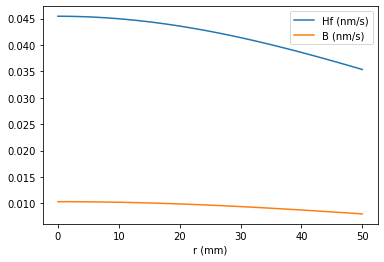

In [15]:
# B
input_data.disch_volt = 357. #V
input_data.disch_cur = 0.168 #Amp
calc_sput = ps.Sputt_plan_circ(input_data)

#Hf 
Hf_input_data.disch_volt = 247 #V
Hf_input_data.disch_cur = 0.0816 #Amp
Hf_calc_sput = ps.Sputt_plan_circ(Hf_input_data)

#format for excel
HfB_4 =pd.DataFrame(
    data = {
        'r (mm)': calc_sput.pR,
        'Hf (nm/s)': Hf_calc_sput.DEP1,
        'B (nm/s)': calc_sput.DEP1
    })

#plot to check
HfB_4.plot(x='r (mm)', y=['Hf (nm/s)','B (nm/s)' ])

# Export all results to excel

In [16]:
writer = pd.ExcelWriter('Ivan_HfB.xlsx', engine='xlsxwriter')

HfB_1.to_excel(writer, sheet_name='HfB_1')
HfB_2.to_excel(writer, sheet_name='HfB_2')
HfB_3.to_excel(writer, sheet_name='HfB_3')
HfB_4.to_excel(writer, sheet_name='HfB_4')

writer.save()